<a href="https://colab.research.google.com/github/adeekodaniel/DataScienceProj/blob/main/Rough%20work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data preparation and preprocessing

Import the necessary packages for the project

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [122]:
df = pd.read_csv('https://raw.githubusercontent.com/adeekodaniel/DataScienceProj/main/adverts.csv') #I uploaded the dataset to my github account and used the link from github

Used .head method to see the dataset

In [123]:
df.head() #to display the first 5 values of the dataset

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


Doing a descriptive statistics on the dataset to better understand the dataframe 

In [124]:
df.shape #the shape method shows there are 402,005 rows and 12 columns in the dataset

(402005, 12)

In [125]:
df.columns #columns method shows the names of each columns in the dataset. 

Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'price', 'body_type', 'crossover_car_and_van',
       'fuel_type'],
      dtype='object')

In [126]:
df.info() #Passing the info method on the dataset in order to view a general summary and information about the dataset, which includes the datatypes, range index etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


After observing the different data types of the different columns, we observe that year_of_registration data type as a float isn't correct, as year should be integer data type. Also it is essential to check if there are any duplicated rows in the dataset.



In [127]:
df.duplicated().sum() # this shows that there are no duplicated rows in the dataset.

0

In [128]:
df.describe() #to view the numerical summary statistics across the columns in the dataset

,public_reference,mileage,year_of_registration,price
count,4.020050e+05,401878.000000,368694.000000,4.020050e+05
mean,2.020071e+14,37743.595656,2015.006206,1.734197e+04
std,1.691662e+10,34831.724018,7.962667,4.643746e+04
min,2.013072e+14,0.000000,999.000000,1.200000e+02
25%,2.020090e+14,10481.000000,2013.000000,7.495000e+03
50%,2.020093e+14,28629.500000,2016.000000,1.260000e+04
75%,2.020102e+14,56875.750000,2018.000000,2.000000e+04
max,2.020110e+14,999999.000000,2020.000000,9.999999e+06


In [129]:
df.isna().sum() #we need to view the number of missing values in each cell

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

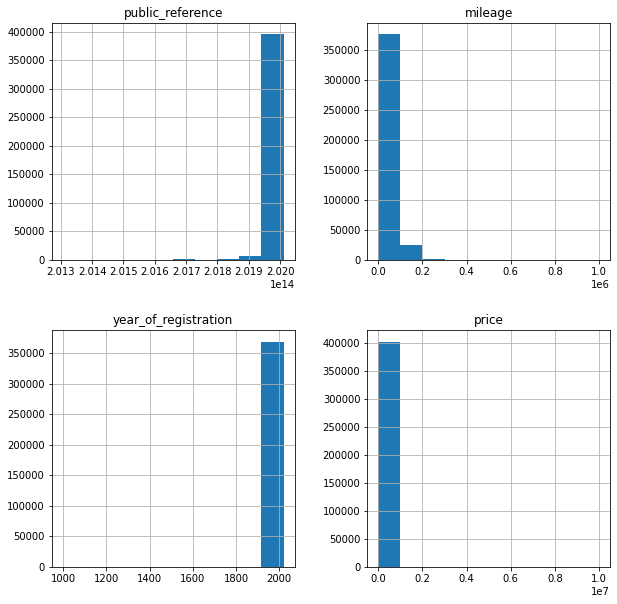

In [130]:
df.hist(figsize=(10,10)); # just a rough check on the distribution of the numerical features

# New section

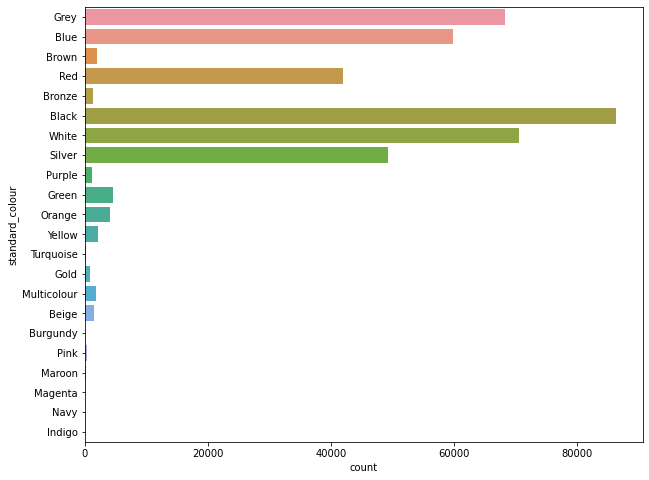

In [131]:
plt.figure(figsize=(10,8))
sns.countplot(y= df['standard_colour']);


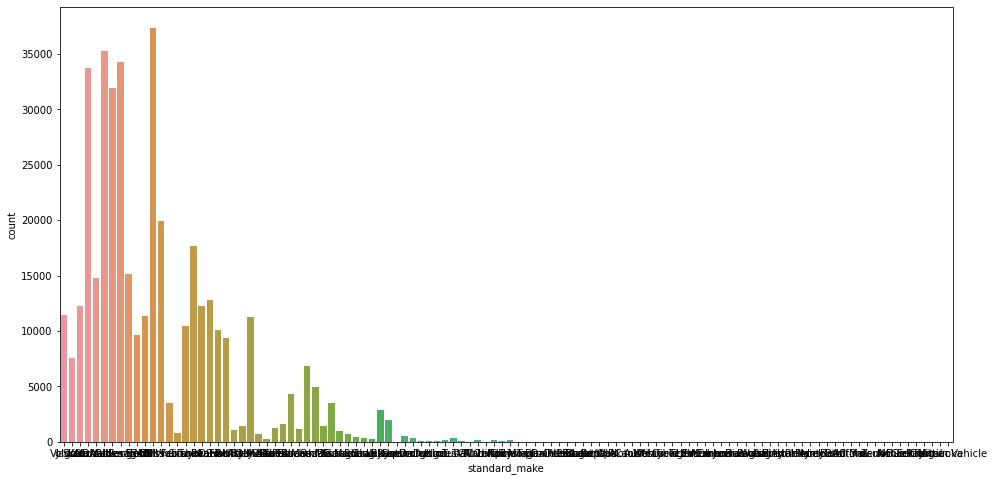

In [132]:
plt.figure(figsize=(16,8))
sns.countplot(x=df['standard_make']);

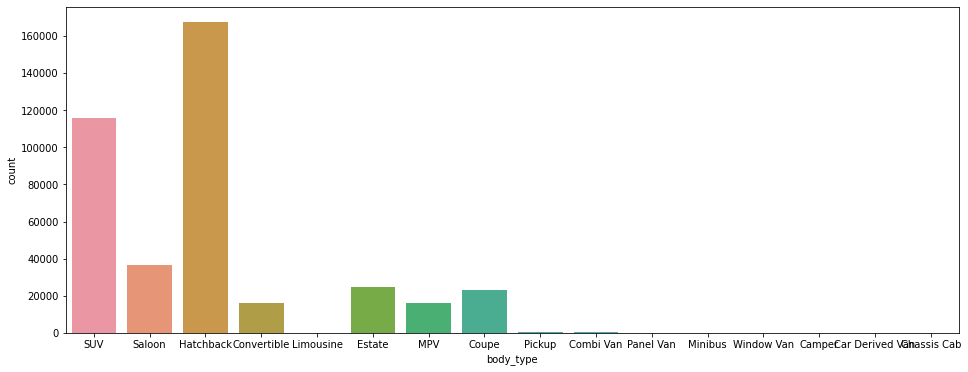

In [133]:
plt.figure(figsize=(16,6))
sns.countplot(x = df['body_type'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


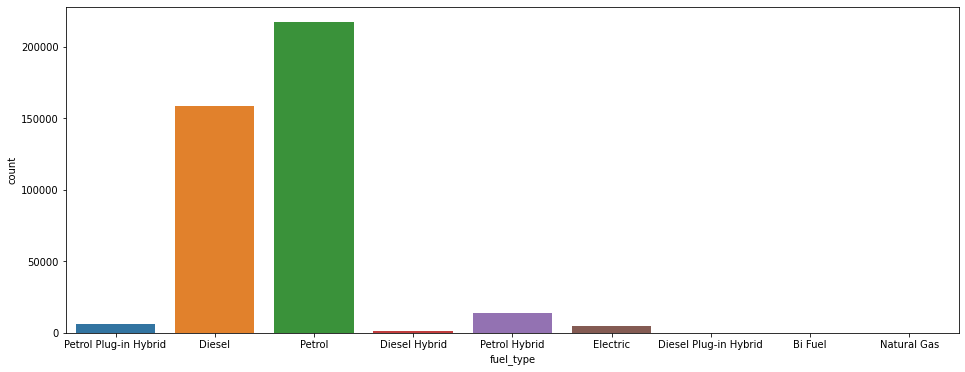

In [134]:
plt.figure(figsize=(16,6))
sns.countplot(df['fuel_type']);

There are some missing values in the year of registration column, filling up the missing values so as to be able to change the data type from Float to int

In [135]:
df['year_of_registration'] = df['year_of_registration'].fillna(2021) #Filling the NaN values in the year of registration column as 2021, to be representive of the year 2021
df['year_of_registration'] = df['year_of_registration'].astype(int)
df['year_of_registration'].dtypes   #to see if the change in data type for year of registration is succesful

dtype('int64')

In [136]:
df['year_of_registration'].unique() #to view the unique values in the year_of_registration column
#we can see from the result here that some values which are not in the 'yyyy' format and there are some errors in some year. We can either drop them or segregate the data into two parts.

array([2021, 2011, 2017, 2016, 2015, 2013, 2008, 2019, 2010, 2012, 2018,
       2009, 1984, 2014, 2003, 2006, 2020, 2005, 2000, 2002, 2007, 2004,
       1991, 2001, 1986, 1998, 1990, 1993, 1987, 1994, 1999, 1970, 1988,
       1995, 1997, 1969, 1992, 1989, 1996, 1976, 1983, 1980, 1973, 1962,
       1967, 1972, 1982, 1968, 1979, 1964, 1933, 1981, 1985, 1978, 1971,
       1974, 1966, 1977, 1961, 1965, 1007, 1957, 1515, 1963, 1063, 1954,
       1975, 1955, 1009, 1016, 1960, 1956, 1959, 1909, 1934, 1958, 1010,
       1950, 1008, 1018,  999, 1017, 1952, 1006, 1015])

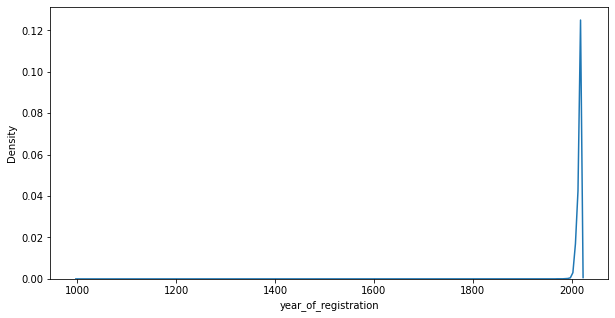

In [137]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x="year_of_registration") #using the kdeplot, our distribution is skewed to the right

From the KDE distribution above, most of our data falls in the >1999s years range, and the summary statisctics shows that our averagew year is 2015. We can then focus on years that are greater than 1999 for our work. Hence we divide the dataset into two (2) groups. 


1.   Year greater than 1999
2.   Year less than 2000



In [138]:
less_2000 = df[df['year_of_registration'] < 2000] #for years less than 2000's
less_2000.sample()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
372876,202009244174190,107000.0,J,Black,Honda,CR-X,USED,1991,4000,Hatchback,False,Petrol


In [139]:
greater_1999 = df[df['year_of_registration'] > 1999] #for years greater than 1999
greater_1999.sample(2)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
74558,202010094821450,100000.0,05,Silver,BMW,5 Series,USED,2005,3995,Saloon,False,Diesel
73675,202008011968574,121.0,20,White,Suzuki,Jimny,USED,2020,23991,SUV,False,Petrol


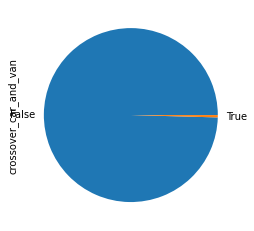

In [140]:

ax= greater_1999['crossover_car_and_van'].value_counts().plot.pie();

<Figure size 720x720 with 0 Axes>

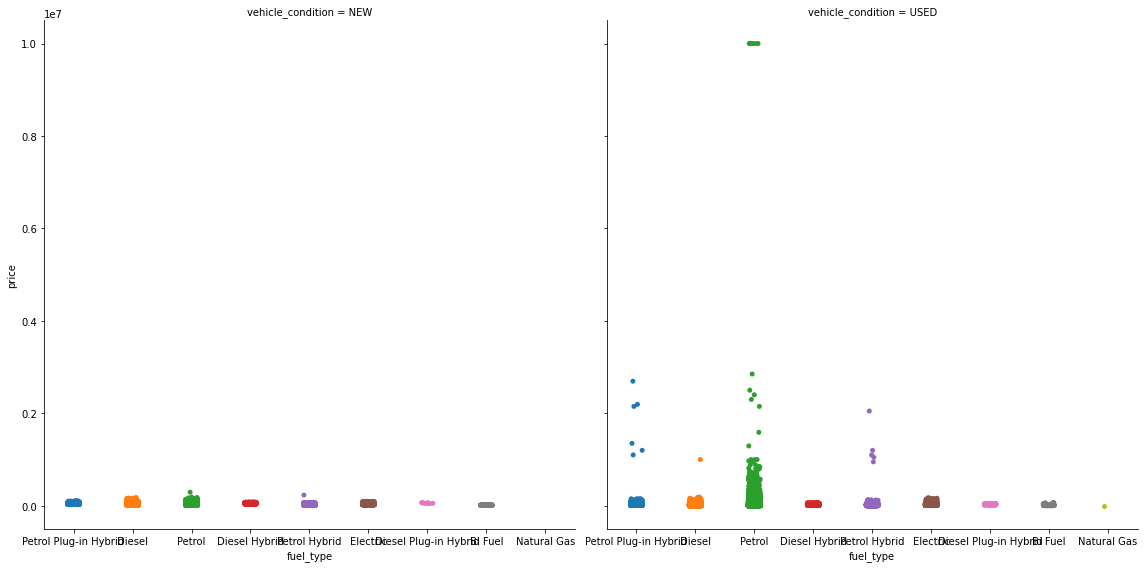

In [141]:
plt.figure(figsize=(10,10))
sns.catplot(data=greater_1999, col='vehicle_condition', x='fuel_type', y='price', height=8);

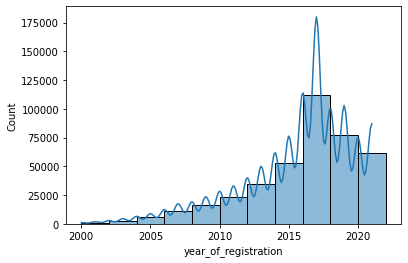

In [142]:
sns.histplot(data=greater_1999, x="year_of_registration", binwidth=2, kde=True) #to show the distribution for car registered with years greater than 1999

In [143]:
greater_1999.info() #to view the information about the new dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399921 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       399921 non-null  int64  
 1   mileage                399797 non-null  float64
 2   reg_code               368139 non-null  object 
 3   standard_colour        394721 non-null  object 
 4   standard_make          399921 non-null  object 
 5   standard_model         399921 non-null  object 
 6   vehicle_condition      399921 non-null  object 
 7   year_of_registration   399921 non-null  int64  
 8   price                  399921 non-null  int64  
 9   body_type              399139 non-null  object 
 10  crossover_car_and_van  399921 non-null  bool   
 11  fuel_type              399350 non-null  object 
dtypes: bool(1), float64(1), int64(3), object(7)
memory usage: 45.1+ MB


In [144]:
greater_1999.isna().sum() #to see the numbers of missiong values in the new dataset

public_reference             0
mileage                    124
reg_code                 31782
standard_colour           5200
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration         0
price                        0
body_type                  782
crossover_car_and_van        0
fuel_type                  571
dtype: int64

From inspection of the dataset, Public reference and Registration code are not essential for our analysis, Hence we will be dropping these columns.

In [145]:
greater_1999 = greater_1999.drop(columns=['public_reference', 'reg_code']) #dropping public reference annd reg_code column
greater_1999.sample()

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
175017,45414.0,Grey,Land Rover,Range Rover Evoque,USED,2016,19025,SUV,False,Diesel


In [146]:
greater_1999.isna().sum()

mileage                   124
standard_colour          5200
standard_make               0
standard_model              0
vehicle_condition           0
year_of_registration        0
price                       0
body_type                 782
crossover_car_and_van       0
fuel_type                 571
dtype: int64

In [147]:
greater_1999.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399921 entries, 0 to 402004
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   mileage                399797 non-null  float64
 1   standard_colour        394721 non-null  object 
 2   standard_make          399921 non-null  object 
 3   standard_model         399921 non-null  object 
 4   vehicle_condition      399921 non-null  object 
 5   year_of_registration   399921 non-null  int64  
 6   price                  399921 non-null  int64  
 7   body_type              399139 non-null  object 
 8   crossover_car_and_van  399921 non-null  bool   
 9   fuel_type              399350 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 39.0+ MB


In [148]:
greater_1999.describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
mileage,399797.0,37518.45,34620.57,0.0,10396.0,28449.0,56284.0,999999.0
year_of_registration,399921.0,2015.68,4.04,2000.0,2014.0,2017.0,2019.0,2021.0
price,399921.0,17261.10,46061.68,120.0,7495.0,12642.0,20000.0,9999999.0


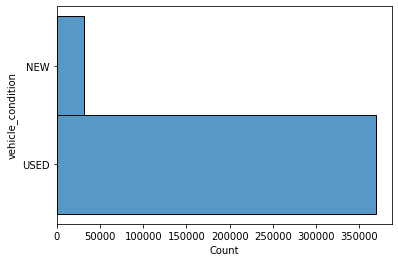

In [149]:
sns.histplot(data=greater_1999, y='vehicle_condition');


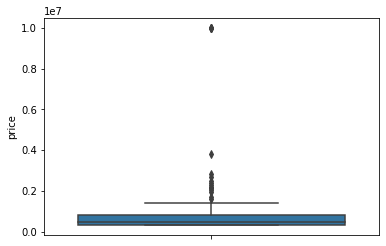

In [150]:
sns.boxplot(y=greater_1999.loc[greater_1999['price']>300000, 'price']);

In [151]:

#greater_1999[greater_1999['price']>800000]

In [152]:
greater_1999['price'].describe().round(2)

count     399921.00
mean       17261.10
std        46061.68
min          120.00
25%         7495.00
50%        12642.00
75%        20000.00
max      9999999.00
Name: price, dtype: float64

In [153]:
greater_1999.isna().sum()

mileage                   124
standard_colour          5200
standard_make               0
standard_model              0
vehicle_condition           0
year_of_registration        0
price                       0
body_type                 782
crossover_car_and_van       0
fuel_type                 571
dtype: int64



```
# This is formatted as code
```

# Dealing with Missing Values

In [154]:
greater_1999['mileage'] = greater_1999['mileage'].fillna(greater_1999['mileage'].mean())
greater_1999 = greater_1999.dropna()

In [155]:
greater_1999.isna().sum()

mileage                  0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
dtype: int64

In [156]:
greater_1999.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393517 entries, 0 to 402004
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   mileage                393517 non-null  float64
 1   standard_colour        393517 non-null  object 
 2   standard_make          393517 non-null  object 
 3   standard_model         393517 non-null  object 
 4   vehicle_condition      393517 non-null  object 
 5   year_of_registration   393517 non-null  int64  
 6   price                  393517 non-null  int64  
 7   body_type              393517 non-null  object 
 8   crossover_car_and_van  393517 non-null  bool   
 9   fuel_type              393517 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 30.4+ MB


In [157]:
#sns.pairplot(greater_1999, height=1.5)

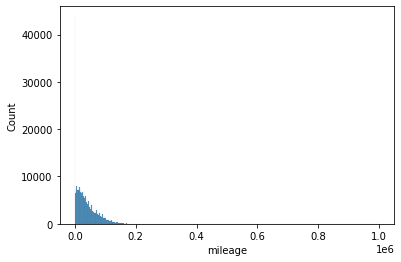

In [158]:

sns.histplot(greater_1999['mileage']);

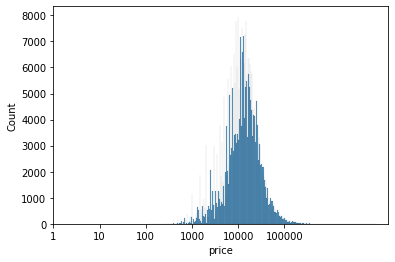

In [159]:
#sns.histplot(greater_1999.loc[greater_1999['price']>0, 'price']);
ax = sns.histplot(np.log10(greater_1999.loc[greater_1999['price']>100, 'price']))
ax.set_xticks(range(0,6))
ax.set_xticklabels(np.power(10, range(0,6)));

In [160]:
greater_1999.describe()

,mileage,year_of_registration,price
count,393517.000000,393517.000000,3.935170e+05
mean,37593.054903,2015.665293,1.707552e+04
std,34531.924109,4.021993,4.533644e+04
min,0.000000,2000.000000,1.200000e+02
25%,10609.000000,2014.000000,7.495000e+03
50%,28591.000000,2017.000000,1.251900e+04
75%,56260.000000,2018.000000,1.999500e+04
max,999999.000000,2021.000000,9.999999e+06


In [161]:
greater_1999['price'].tail()

402000    10595
402001     2000
402002     7250
402003    11490
402004    20520
Name: price, dtype: int64

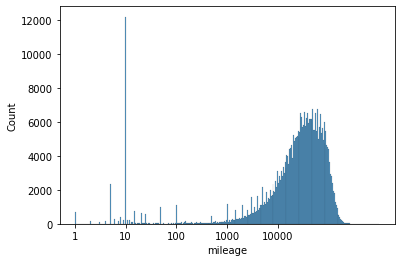

In [162]:
ax = sns.histplot(np.log10(greater_1999.loc[greater_1999['mileage']>0, 'mileage']))
ax.set_xticks(range(0,5))
ax.set_xticklabels(np.power(10, range(0,5)));

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


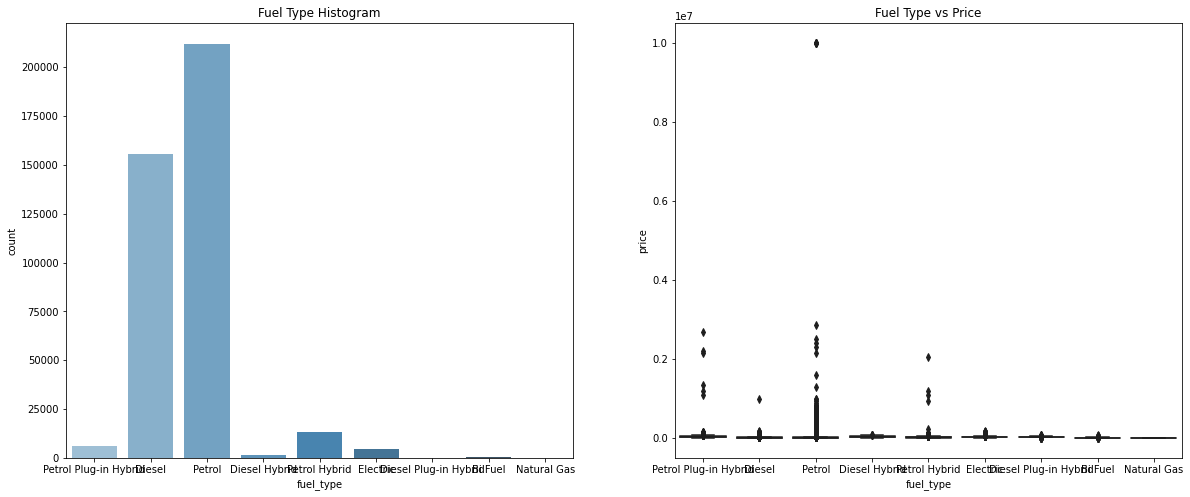

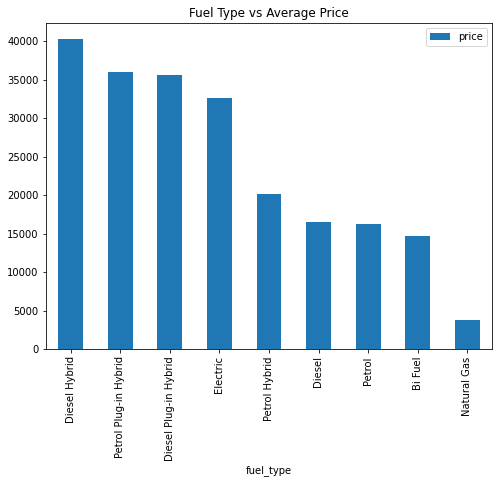

In [163]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Fuel Type Histogram')
sns.countplot(greater_1999['fuel_type'], palette=('Blues_d'))

plt.subplot(1,2,2)
plt.title('Fuel Type vs Price')
sns.boxplot(x=greater_1999['fuel_type'], y=greater_1999['price'], palette='PuBuGn')

plt.show()

test = pd.DataFrame(greater_1999.groupby(['fuel_type'])['price'].mean().sort_values(ascending=False))
test.plot.bar(figsize=(8,6))
plt.title('Fuel Type vs Average Price')
plt.show()

# Top features 

What is the top 10 car model?

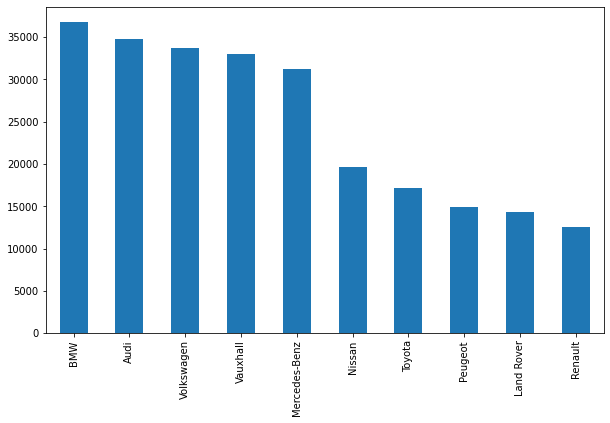

In [192]:
top_maker = greater_1999['standard_make'].value_counts().head(10)
top_maker.plot.bar(figsize=(10,6));

In [193]:
top_maker

BMW              36744
Audi             34822
Volkswagen       33687
Vauxhall         33067
Mercedes-Benz    31291
Nissan           19658
Toyota           17195
Peugeot          14957
Land Rover       14274
Renault          12512
Name: standard_make, dtype: int64

What are the top 5 body types?

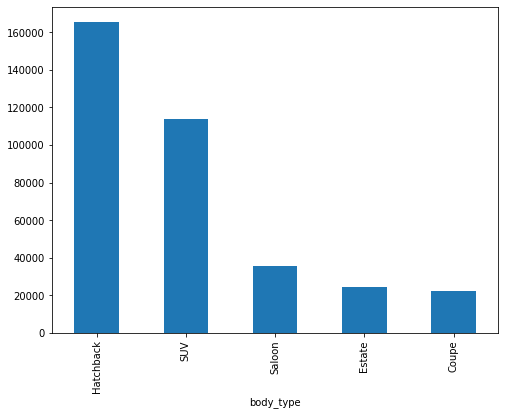

In [211]:
top_body_type = greater_1999.value_counts('body_type').head()
top_body_type.plot.bar(figsize=(8,6))

What are the top 5 colours across brands?

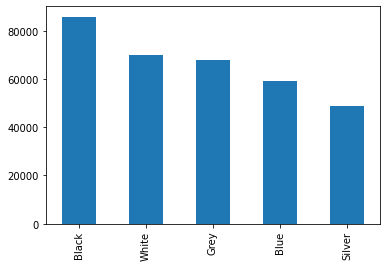

In [177]:
top_colors = greater_1999['standard_colour'].value_counts().head()
top_colors.plot.bar()

Does color affect price?

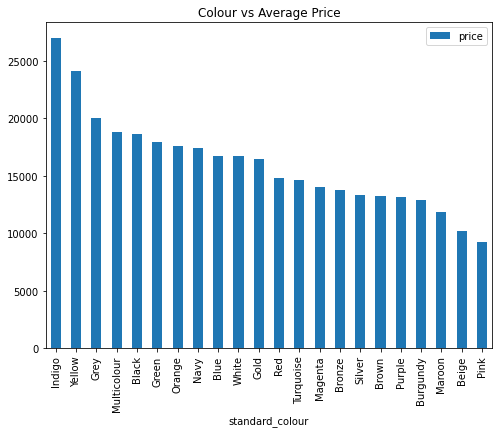

In [182]:
col_vs_price = pd.DataFrame(greater_1999.groupby(['standard_colour'])['price'].mean().sort_values(ascending=False))
col_vs_price.plot.bar(figsize=(8,6))
plt.title('Colour vs Average Price')
plt.show()

What condition are the top body types?
What condition are the top maker type?

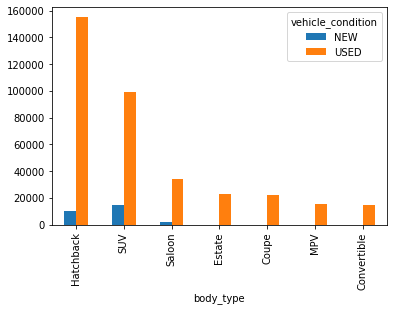

In [215]:
body_type_condition = greater_1999.value_counts(['body_type', 'vehicle_condition']).head(10)
body_type_condition #The first 5 are all used cars, how about extending the list to 10?
body_type_condition.unstack().plot.bar()

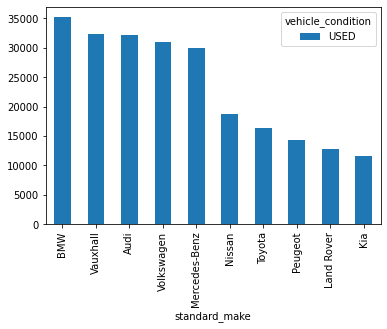

In [217]:
maker_type_condition = greater_1999.value_counts(['standard_make', 'vehicle_condition']).head(10)
maker_type_condition #the first 5 are also used, how about extending to 10
maker_type_condition.unstack().plot.bar()

What fuel types are the top makers and top body type made of?


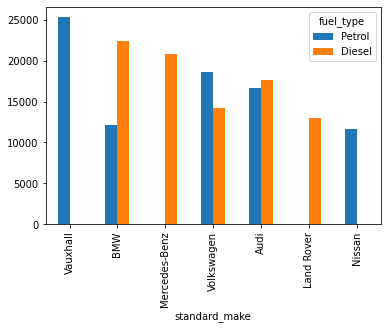

In [222]:
top_maker_fuel_type = greater_1999.value_counts(['standard_make', 'fuel_type']).head(10)
top_maker_fuel_type 
top_maker_fuel_type.unstack().plot.bar();

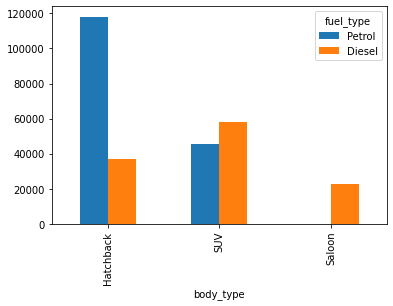

In [220]:
top_body_fuel_type = greater_1999.value_counts(['body_type', 'fuel_type']).head()
top_body_fuel_type 
top_body_fuel_type.unstack().plot.bar();